In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
base_path = '/content/drive/MyDrive/Colab Notebooks/크몽/IRR/'
df = pd.read_csv(base_path + 'DataTableforFigure3-수정.csv')

In [3]:
df

CV risk                   Time period             Overall  \
0   Myocardial infarction               Pre-risk period    0.34 (0.19-0.62)   
1   Myocardial infarction  Risk period after first dose    0.87 (0.54-1.39)   
2   Myocardial infarction    Risk period after 2nd dose    0.71 (0.43-1.17)   
3   Myocardial infarction    Risk period after 3rd dose    1.26 (0.67-2.37)   
4   Myocardial infarction             Whole risk period    0.86 (0.63-1.19)   
5   Myocardial infarction                                                 -   
6                  Stroke               Pre-risk period    0.38 (0.30-0.49)   
7                  Stroke  Risk period after first dose    0.82 (0.67-1.01)   
8                  Stroke    Risk period after 2nd dose    0.81 (0.65-1.01)   
9                  Stroke    Risk period after 3rd dose    1.25 (0.86-1.80)   
10                 Stroke             Whole risk period    0.86 (0.74-1.00)   
11                 Stroke                                                 -   
12            Myocarditis               Pre-risk period    1.36 (0.37-4.95)   
13            Myocarditis  Risk period after first dose  12.36 (5.90-25.92)   
14            Myocarditis    Risk period after 2nd dose  12.43 (5.67-27.24)   
15            Myocarditis    Risk period after 3rd dose   5.99 (1.35-26.54)   
16            Myocarditis             Whole risk period  11.71 (5.88-23.35)   
17            Myocarditis                                                 -   
18           Pericarditis               Pre-risk period    0.32 (0.08-1.33)   
19           Pericarditis  Risk period after first dose    0.70 (0.21-2.34)   
20           Pericarditis    Risk period after 2nd dose    1.74 (0.75-4.07)   
21           Pericarditis    Risk period after 3rd dose    1.51 (0.32-7.14)   
22           Pericarditis             Whole risk period    1.25 (0.63-2.47)   
23           Pericarditis                                                 -   
24               Total CV               Pre-risk period    0.55 (0.49-0.63)   
25               Total CV  Risk period after first dose    0.94 (0.83-1.07)   
26               Total CV    Risk period after 2nd dose    1.01 (0.88-1.15)   
27               Total CV    Risk period after 3rd dose    1.11 (0.87-1.43)   
28               Total CV             Whole risk period    0.99 (0.90-1.08)   

           mRNA vaccine ChAdOx1 nCov-19 vaccine         Mixed-match  
0      0.16 (0.05-0.51)         0.64 (0.25-1.63)   0.52 (0.18-1.51)  
1      0.98 (0.55-1.75)         0.57 (0.17-1.89)   0.81 (0.24-2.74)  
2      0.69 (0.36-1.32)         0.99 (0.38-2.57)   0.63 (0.15-2.72)  
3      1.29 (0.59-2.80)                        -   1.23 (0.41-3.69)  
4      0.91 (0.61-1.36)         0.78 (0.36-1.69)   0.89 (0.41-1.94)  
5                     -                        -                  -  
6      0.32 (0.21-0.48)         0.23 (0.14-0.38)   0.69 (0.47-1.03)  
7      0.96 (0.72-1.27)         0.76 (0.53-1.10)   0.56 (0.33-0.93)  
8      0.82 (0.61-1.11)         1.26 (0.87-1.81)   0.37 (0.15-0.92)  
9      1.58 (0.99-2.50)                        -   1.21 (0.65-2.25)  
10     0.96 (0.79-1.17)         0.95 (0.72-1.25)   0.64 (0.44-0.95)  
11                    -                        -                  -  
12     0.59 (0.07-4.81)                        -  2.13 (0.36-12.54)  
13   12.15 (5.29-27.91)       6.59 (0.40-108.60)                  -  
14   11.03 (4.50-27.03)  301.10 (14.67-6,181.00)  3.01 (0.26-34.47)  
15  31.01 (2.45-391.70)                        -  2.96 (0.25-34.88)  
16   12.37 (5.58-27.43)      25.05 (2.93-214.40)   1.45 (0.25-8.53)  
17                    -                        -                  -  
18                    -                        -   0.95 (0.19-4.67)  
19     0.52 (0.07-3.96)         0.90 (0.10-7.84)   0.77 (0.09-6.49)  
20     3.02 (1.22-7.46)                        -                  -  
21                    -                        -  3.21 (0.55-18.64)  
22     1.66 (0.71-3.90)         0.56 

In [4]:
df.columns

Index(['CV risk', 'Time period', 'Overall', 'mRNA vaccine',
       'ChAdOx1 nCov-19 vaccine ', 'Mixed-match'],
      dtype='object')

In [5]:
# Function to extract numbers within brackets
def extract_bracket_numbers(text):
    if pd.isna(text) or not isinstance(text, str):
        return None
    match = re.search(r'\((.*?)\)', text)
    if match:
        return match.group(1)
    return None

# Function to remove numbers within brackets
def remove_bracket_numbers(text):
    if pd.isna(text) or not isinstance(text, str):
        return None
    return re.sub(r'\s?\(.*?\)', '', text)

# Create new columns
df['Overall_Lower_Upper'] = df['Overall'].apply(extract_bracket_numbers)
df['mRNA vaccine_Lower_Upper'] = df['mRNA vaccine'].apply(extract_bracket_numbers)
df['ChAdOx1 nCov-19 vaccine_Lower_Upper'] = df['ChAdOx1 nCov-19 vaccine '].apply(extract_bracket_numbers)
df['Mixed-match_Lower_Upper'] = df['Mixed-match'].apply(extract_bracket_numbers)

# Create a new column with numbers within brackets removed
df['Overall'] = df['Overall'].apply(remove_bracket_numbers)
df['mRNA vaccine'] = df['mRNA vaccine'].apply(remove_bracket_numbers)
df['ChAdOx1 nCov-19 vaccine '] = df['ChAdOx1 nCov-19 vaccine '].apply(remove_bracket_numbers)
df['Mixed-match'] = df['Mixed-match'].apply(remove_bracket_numbers)

# Split the new column into two separate columns
df[['Overall_Lower', 'Overall_Upper']] = df['Overall_Lower_Upper'].str.split('-', expand=True)
df[['mRNA_Lower', 'mRNA_Upper']] = df['mRNA vaccine_Lower_Upper'].str.split('-', expand=True)
df[['ChAdOx1_Lower', 'ChAdOx1_Upper']] = df['ChAdOx1 nCov-19 vaccine_Lower_Upper'].str.split('-', expand=True)
df[['Mixed_Lower', 'Mixed_Upper']] = df['Mixed-match_Lower_Upper'].str.split('-', expand=True)

# Remove the temporary column
df.drop(columns=['Overall_Lower_Upper'], inplace=True)
df.drop(columns=['mRNA vaccine_Lower_Upper'], inplace=True)
df.drop(columns=['ChAdOx1 nCov-19 vaccine_Lower_Upper'], inplace=True)
df.drop(columns=['Mixed-match_Lower_Upper'], inplace=True)

# Replace '-' with None in the DataFrame
df.replace('-', None, inplace=True)

# Object열을 숫자로 변환
df['Overall'] = pd.to_numeric(df['Overall'])
df['mRNA vaccine'] = pd.to_numeric(df['mRNA vaccine'])
df['ChAdOx1 nCov-19 vaccine '] = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine '])
df['Mixed-match'] = pd.to_numeric(df['Mixed-match'])

df['Overall_Lower'] = pd.to_numeric(df['Overall_Lower'])
df['Overall_Lower'] = df['Overall'] - df['Overall_Lower']
df['Overall_Upper'] = pd.to_numeric(df['Overall_Upper'])
df['Overall_Upper'] = df['Overall_Upper'] - df['Overall']
# df['Overall_Upper'] = df['Overall_Upper'].apply(lambda x: np.where(x > 40, 40, x))

df['mRNA_Lower'] = pd.to_numeric(df['mRNA_Lower'])
df['mRNA_Lower'] = df['mRNA vaccine'] - df['mRNA_Lower']
df['mRNA_Upper'] = pd.to_numeric(df['mRNA_Upper'])
df['mRNA_Upper'] = df['mRNA_Upper'] - df['mRNA vaccine']
# df['mRNA_Upper'] = df['mRNA_Upper'].apply(lambda x: np.where(x > 40, 40, x))

df['ChAdOx1_Lower'] = pd.to_numeric(df['ChAdOx1_Lower'])
df['ChAdOx1_Lower'] = df['ChAdOx1 nCov-19 vaccine '] - df['ChAdOx1_Lower']
# df['ChAdOx1_Upper'] = pd.to_numeric(df['ChAdOx1_Upper'])

df['Mixed_Lower'] = pd.to_numeric(df['Mixed_Lower'])
df['Mixed_Lower'] = df['Mixed-match'] - df['Mixed_Lower']
df['Mixed_Upper'] = pd.to_numeric(df['Mixed_Upper'])
df['Mixed_Upper'] = df['Mixed_Upper'] - df['Mixed-match']
# df['Mixed_Upper'] = df['Mixed_Upper'].apply(lambda x: np.where(x > 40, 40, x))

# # Converting other relevant columns to numeric types
# df['Overall'] = pd.to_numeric(df['Overall'], errors='coerce')
# df['mRNA vaccine'] = pd.to_numeric(df['mRNA vaccine'], errors='coerce')
# df['ChAdOx1 nCov-19 vaccine '] = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine '], errors='coerce')
# df['Mixed-match'] = pd.to_numeric(df['Mixed-match'], errors='coerce')

df

CV risk                   Time period  Overall  \
0   Myocardial infarction               Pre-risk period     0.34   
1   Myocardial infarction  Risk period after first dose     0.87   
2   Myocardial infarction    Risk period after 2nd dose     0.71   
3   Myocardial infarction    Risk period after 3rd dose     1.26   
4   Myocardial infarction             Whole risk period     0.86   
5   Myocardial infarction                                    NaN   
6                  Stroke               Pre-risk period     0.38   
7                  Stroke  Risk period after first dose     0.82   
8                  Stroke    Risk period after 2nd dose     0.81   
9                  Stroke    Risk period after 3rd dose     1.25   
10                 Stroke             Whole risk period     0.86   
11                 Stroke                                    NaN   
12            Myocarditis               Pre-risk period     1.36   
13            Myocarditis  Risk period after first dose    12.36   
14            Myocarditis    Risk period after 2nd dose    12.43   
15            Myocarditis    Risk period after 3rd dose     5.99   
16            Myocarditis             Whole risk period    11.71   
17            Myocarditis                                    NaN   
18           Pericarditis               Pre-risk period     0.32   
19           Pericarditis  Risk period after first dose     0.70   
20           Pericarditis    Risk period after 2nd dose     1.74   
21           Pericarditis    Risk period after 3rd dose     1.51   
22           Pericarditis             Whole risk period     1.25   
23           Pericarditis                                    NaN   
24               Total CV               Pre-risk period     0.55   
25               Total CV  Risk period after first dose     0.94   
26               Total CV    Risk period after 2nd dose     1.01   
27               Total CV    Risk period after 3rd dose     1.11   
28               Total CV             Whole risk period     0.99   

    mRNA vaccine  ChAdOx1 nCov-19 vaccine   Mixed-match  Overall_Lower  \
0           0.16                      0.64         0.52           0.15   
1           0.98                      0.57         0.81           0.33   
2           0.69                      0.99         0.63           0.28   
3           1.29                       NaN         1.23           0.59   
4           0.91                      0.78         0.89           0.23   
5            NaN                       NaN          NaN            NaN   
6           0.32                      0.23         0.69           0.08   
7           0.96                      0.76         0.56           0.15   
8           0.82                      1.26         0.37           0.16   
9           1.58                       NaN         1.21           0.39   
10          0.96                      0.95         0.64           0.12   
11           NaN                       NaN          NaN            NaN   
12          0.59                       NaN         2.13           0.99   
13         12.15                      6.59          NaN           6.46   
14         11.03                    301.10         3.01           6.76   
15         31.01                       NaN         2.96           4.64   
16         12.37                     25.05         1.45           5.83   
17           NaN                       NaN          NaN            NaN   
18           NaN                       NaN         0.95           0.24   
19          0.52                      0.90         0.77           0.49   
20          3.02                       NaN          NaN           0.99   
21           NaN                       NaN         3.21           1.19   
22          1.66                      0.56         1.08           0.62   
23           NaN                       NaN          NaN            NaN   
24          0.48                      0.50         0.80           0.06   
25          1.02                      0.90         0.

Overall	mRNA vaccine	ChAdOx1 nCov-19 vaccine	Mixed-match
4개 컬럼 -> y 축

CV risk, Time period		-> x축

In [6]:
df.dtypes

CV risk                      object
Time period                  object
Overall                     float64
mRNA vaccine                float64
ChAdOx1 nCov-19 vaccine     float64
Mixed-match                 float64
Overall_Lower               float64
Overall_Upper               float64
mRNA_Lower                  float64
mRNA_Upper                  float64
ChAdOx1_Lower               float64
ChAdOx1_Upper                object
Mixed_Lower                 float64
Mixed_Upper                 float64
dtype: object

In [7]:
# Remove commas and convert to numeric
df['ChAdOx1_Upper'] = pd.to_numeric(df['ChAdOx1_Upper'].str.replace(',', ''), errors='coerce')
# df['ChAdOx1_Upper'] = df['ChAdOx1_Upper'].apply(lambda x: np.where(x > 40, 40, x))
df['ChAdOx1_Upper'] = df['ChAdOx1_Upper'] - df['ChAdOx1 nCov-19 vaccine ']
# Validate the dtype after conversion
df['ChAdOx1_Upper'], df['ChAdOx1_Upper'].dtype

(0        0.99
 1        1.32
 2        1.58
 3         NaN
 4        0.91
 5         NaN
 6        0.15
 7        0.34
 8        0.55
 9         NaN
 10       0.30
 11        NaN
 12        NaN
 13     102.01
 14    5879.90
 15        NaN
 16     189.35
 17        NaN
 18        NaN
 19       6.94
 20        NaN
 21        NaN
 22       4.14
 23        NaN
 24       0.14
 25       0.24
 26       0.34
 27        NaN
 28       0.20
 Name: ChAdOx1_Upper, dtype: float64,
 dtype('float64'))

In [8]:
df['Mixed_Lower']

0     0.34
1     0.57
2     0.48
3     0.82
4     0.48
5      NaN
6     0.22
7     0.23
8     0.22
9     0.56
10    0.20
11     NaN
12    1.77
13     NaN
14    2.75
15    2.71
16    1.20
17     NaN
18    0.76
19    0.68
20     NaN
21    2.66
22    0.81
23     NaN
24    0.18
25    0.21
26    0.24
27    0.46
28    0.18
Name: Mixed_Lower, dtype: float64

<ipython-input-9-8fa1801ff8e1>:102: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


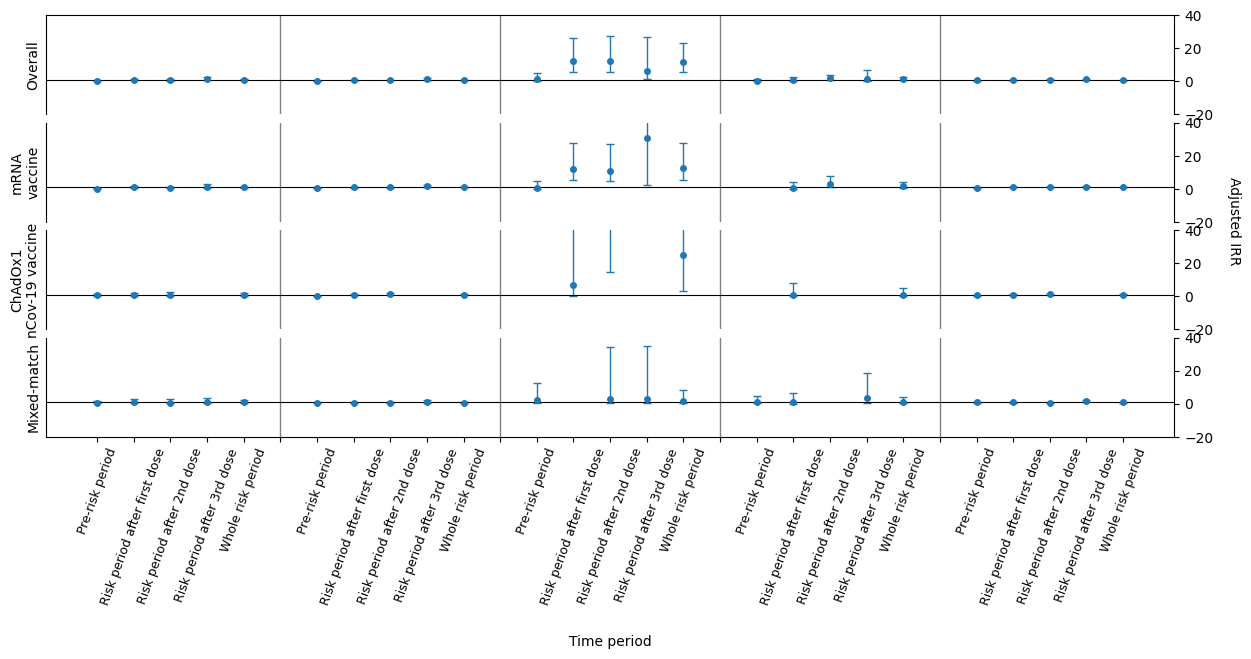

In [9]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 6), constrained_layout=True)

# Define the x positions
x_pos = np.arange(len(x_labels))

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()

# 에러바 그리기
ax[0].errorbar(x_pos, df_Overall, yerr=Overall_error, fmt='o', label='Overall', markersize=4, elinewidth=1, capsize=3)
ax[1].errorbar(x_pos, df_mRNA, yerr=mRNA_error, fmt='o', label='mRNA vaccine', markersize=4, elinewidth=1, capsize=3)
ax[2].errorbar(x_pos, df_ChAdOx1, yerr=ChAdOx1_error, fmt='o', label='ChAdOx1 nCov-19 vaccine', markersize=4, elinewidth=1, capsize=3)
ax[3].errorbar(x_pos, df_Mixed, yerr=Mixed_error, fmt='o', label='Mixed-match', markersize=4, elinewidth=1, capsize=3)

# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)


# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=70, fontsize=9)

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2)

# 값 범위 설정
ax[0].set_ylim(-20,40)
ax[1].set_ylim(-20,40)
ax[2].set_ylim(-20,40)
ax[3].set_ylim(-20,40)

# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270)


# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (y=1 기준으로 세팅)
ax[0].axhline(1, color='black', linewidth=0.8)
ax[1].axhline(1, color='black', linewidth=0.8)
ax[2].axhline(1, color='black', linewidth=0.8)
ax[3].axhline(1, color='black', linewidth=0.8)

# Adding labels and title
plt.xlabel('Time period')
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


# Show the plot
plt.show()

### 색깔 설정

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
<ipython-input-10-dacb3f699112>:108: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


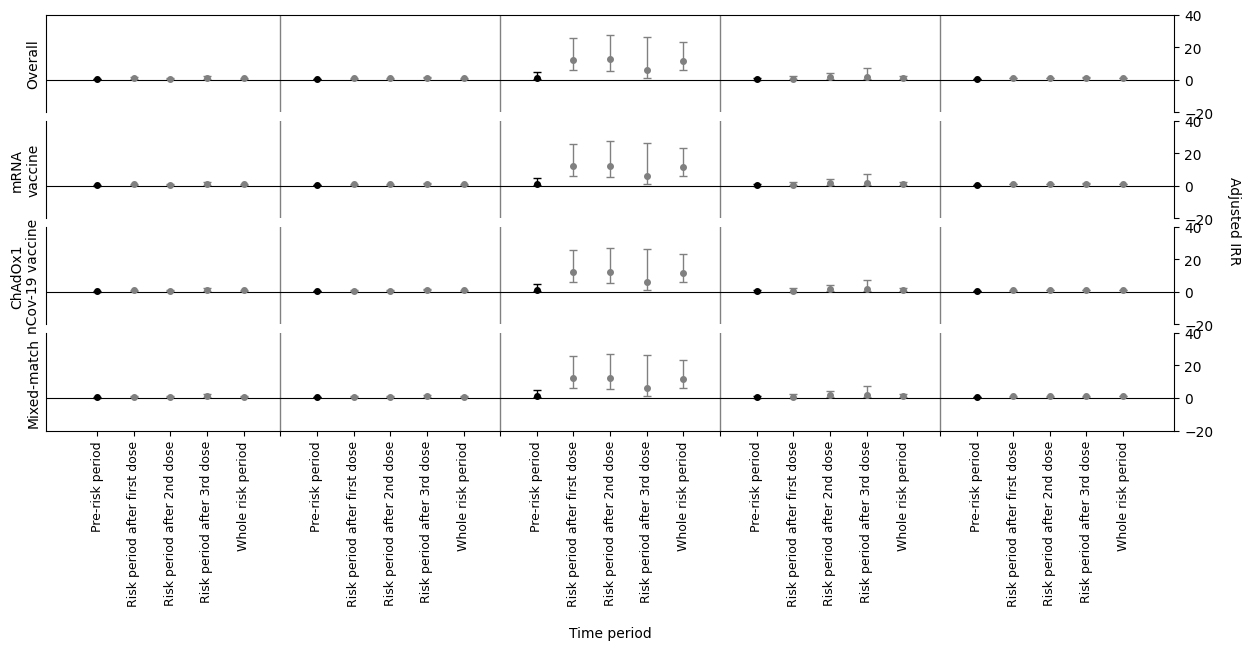

In [10]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 6), constrained_layout=True)

# Define the x positions
x_pos = np.arange(len(x_labels))

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()

# 색깔을 지정할 리스트 생성
colors = ['black' if time_period == 'Pre-risk period' else 'gray' for time_period in df['Time period']]


# First, plot the error bars with the desired color for the lines
for i, (x, y, color) in enumerate(zip(x_pos, df_Overall, colors)):
    lower_error = Overall_error[0][i]
    upper_error = Overall_error[1][i]
    ax[0].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
    ax[1].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
    ax[2].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
    ax[3].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=90, fontsize=9)

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2)

# 값 범위 설정
ax[0].set_ylim(-20,40)
ax[1].set_ylim(-20,40)
ax[2].set_ylim(-20,40)
ax[3].set_ylim(-20,40)

# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270)


# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(0, color='black', linewidth=0.8)
ax[1].axhline(0, color='black', linewidth=0.8)
ax[2].axhline(0, color='black', linewidth=0.8)
ax[3].axhline(0, color='black', linewidth=0.8)

# Adding labels and title
plt.xlabel('Time period')
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


# Show the plot
plt.show()

<ipython-input-11-ea420df1c225>:161: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


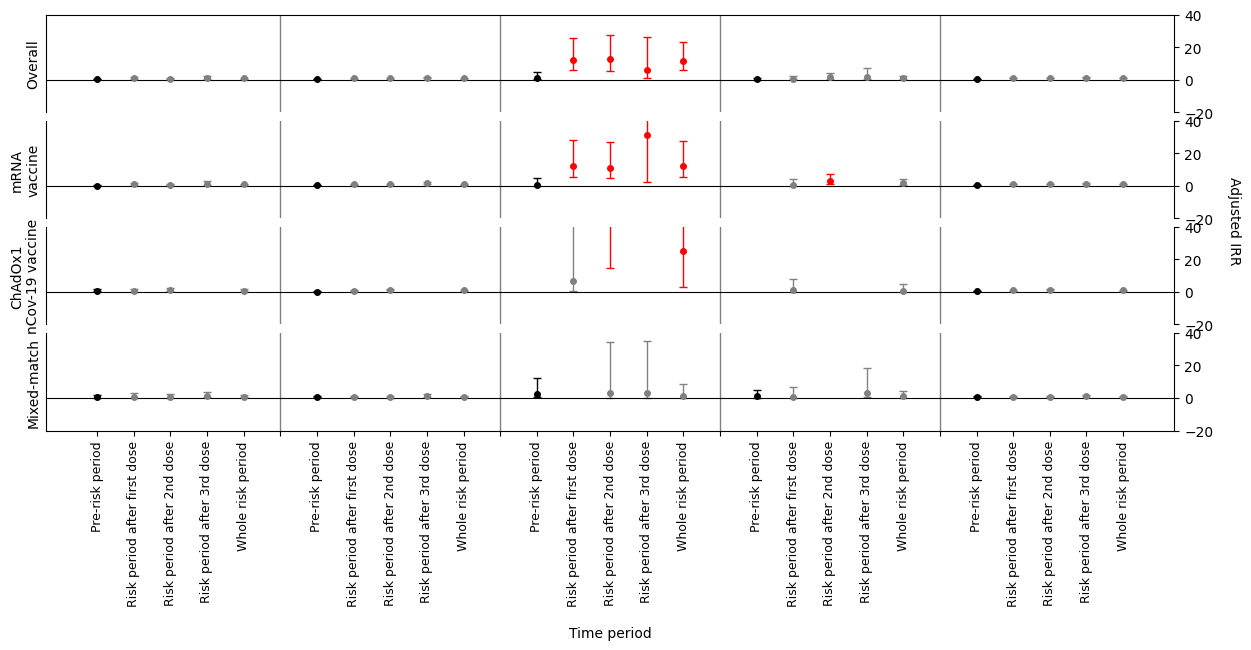

In [11]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 6), constrained_layout=True)

# Define the x positions
x_pos = np.arange(len(x_labels))

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()


# 각 서브플롯에 대한 색깔을 지정
colors_overall = []
colors_mRNA = []
colors_ChAdOx1 = []
colors_Mixed = []

for i in range(len(Overall_error[0])):
    # For Overall
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_overall.append('black')
    elif df_Overall[i] - Overall_lower_error[i] > 1:
        colors_overall.append('red')
    else:
        colors_overall.append('grey')

    # For mRNA
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_mRNA.append('black')
    elif df_mRNA[i] - mRNA_lower_error[i] > 1:
        colors_mRNA.append('red')
    else:
        colors_mRNA.append('grey')

    # For ChAdOx1
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_ChAdOx1.append('black')
    elif df_ChAdOx1[i] - ChAdOx1_lower_error[i] > 1:
        colors_ChAdOx1.append('red')
    else:
        colors_ChAdOx1.append('grey')

    # For Mixed
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_Mixed.append('black')
    elif df_Mixed[i] - Mixed_lower_error[i] > 1:
        colors_Mixed.append('red')
    else:
        colors_Mixed.append('grey')


# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# Overall 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Overall, colors_overall)):
    lower_error = Overall_error[0][i]
    upper_error = Overall_error[1][i]
    ax[0].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# mRNA 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_mRNA, colors_mRNA)):
    lower_error = mRNA_error[0][i]
    upper_error = mRNA_error[1][i]
    ax[1].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# ChAdOx1 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_ChAdOx1, colors_ChAdOx1)):
    lower_error = ChAdOx1_error[0][i]
    upper_error = ChAdOx1_error[1][i]
    ax[2].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# Mixed 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Mixed, colors_Mixed)):
    lower_error = Mixed_error[0][i]
    upper_error = Mixed_error[1][i]
    ax[3].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)


# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=90, fontsize=9)

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2)

# 값 범위 설정
ax[0].set_ylim(-20,40)
ax[1].set_ylim(-20,40)
ax[2].set_ylim(-20,40)
ax[3].set_ylim(-20,40)

# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270)


# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(0, color='black', linewidth=0.8)
ax[1].axhline(0, color='black', linewidth=0.8)
ax[2].axhline(0, color='black', linewidth=0.8)
ax[3].axhline(0, color='black', linewidth=0.8)

# Adding labels and title
plt.xlabel('Time period')
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


# Show the plot
plt.show()

In [12]:
df_Overall

array([ 0.34,  0.87,  0.71,  1.26,  0.86,   nan,  0.38,  0.82,  0.81,
        1.25,  0.86,   nan,  1.36, 12.36, 12.43,  5.99, 11.71,   nan,
        0.32,  0.7 ,  1.74,  1.51,  1.25,   nan,  0.55,  0.94,  1.01,
        1.11,  0.99])

In [13]:
Overall_lower_error

array([0.15, 0.33, 0.28, 0.59, 0.23,  nan, 0.08, 0.15, 0.16, 0.39, 0.12,
        nan, 0.99, 6.46, 6.76, 4.64, 5.83,  nan, 0.24, 0.49, 0.99, 1.19,
       0.62,  nan, 0.06, 0.11, 0.13, 0.24, 0.09])

In [14]:
df_Overall - Overall_lower_error

array([0.19, 0.54, 0.43, 0.67, 0.63,  nan, 0.3 , 0.67, 0.65, 0.86, 0.74,
        nan, 0.37, 5.9 , 5.67, 1.35, 5.88,  nan, 0.08, 0.21, 0.75, 0.32,
       0.63,  nan, 0.49, 0.83, 0.88, 0.87, 0.9 ])

In [15]:
ChAdOx1_lower_error

array([3.9000e-01, 4.0000e-01, 6.1000e-01,        nan, 4.2000e-01,
              nan, 9.0000e-02, 2.3000e-01, 3.9000e-01,        nan,
       2.3000e-01,        nan,        nan, 6.1900e+00, 2.8643e+02,
              nan, 2.2120e+01,        nan,        nan, 8.0000e-01,
              nan,        nan, 4.9000e-01,        nan, 1.1000e-01,
       1.9000e-01, 2.6000e-01,        nan, 1.6000e-01])

In [16]:
df

CV risk                   Time period  Overall  \
0   Myocardial infarction               Pre-risk period     0.34   
1   Myocardial infarction  Risk period after first dose     0.87   
2   Myocardial infarction    Risk period after 2nd dose     0.71   
3   Myocardial infarction    Risk period after 3rd dose     1.26   
4   Myocardial infarction             Whole risk period     0.86   
5   Myocardial infarction                                    NaN   
6                  Stroke               Pre-risk period     0.38   
7                  Stroke  Risk period after first dose     0.82   
8                  Stroke    Risk period after 2nd dose     0.81   
9                  Stroke    Risk period after 3rd dose     1.25   
10                 Stroke             Whole risk period     0.86   
11                 Stroke                                    NaN   
12            Myocarditis               Pre-risk period     1.36   
13            Myocarditis  Risk period after first dose    12.36   
14            Myocarditis    Risk period after 2nd dose    12.43   
15            Myocarditis    Risk period after 3rd dose     5.99   
16            Myocarditis             Whole risk period    11.71   
17            Myocarditis                                    NaN   
18           Pericarditis               Pre-risk period     0.32   
19           Pericarditis  Risk period after first dose     0.70   
20           Pericarditis    Risk period after 2nd dose     1.74   
21           Pericarditis    Risk period after 3rd dose     1.51   
22           Pericarditis             Whole risk period     1.25   
23           Pericarditis                                    NaN   
24               Total CV               Pre-risk period     0.55   
25               Total CV  Risk period after first dose     0.94   
26               Total CV    Risk period after 2nd dose     1.01   
27               Total CV    Risk period after 3rd dose     1.11   
28               Total CV             Whole risk period     0.99   

    mRNA vaccine  ChAdOx1 nCov-19 vaccine   Mixed-match  Overall_Lower  \
0           0.16                      0.64         0.52           0.15   
1           0.98                      0.57         0.81           0.33   
2           0.69                      0.99         0.63           0.28   
3           1.29                       NaN         1.23           0.59   
4           0.91                      0.78         0.89           0.23   
5            NaN                       NaN          NaN            NaN   
6           0.32                      0.23         0.69           0.08   
7           0.96                      0.76         0.56           0.15   
8           0.82                      1.26         0.37           0.16   
9           1.58                       NaN         1.21           0.39   
10          0.96                      0.95         0.64           0.12   
11           NaN                       NaN          NaN            NaN   
12          0.59                       NaN         2.13           0.99   
13         12.15                      6.59          NaN           6.46   
14         11.03                    301.10         3.01           6.76   
15         31.01                       NaN         2.96           4.64   
16         12.37                     25.05         1.45           5.83   
17           NaN                       NaN          NaN            NaN   
18           NaN                       NaN         0.95           0.24   
19          0.52                      0.90         0.77           0.49   
20          3.02                       NaN          NaN           0.99   
21           NaN                       NaN         3.21           1.19   
22          1.66                      0.56         1.08           0.62   
23           NaN                       NaN          NaN            NaN   
24          0.48                      0.50         0.80           0.06   
25          1.02                      0.90         0.

### y축 간격 설정

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
<ipython-input-17-e071949c26f9>:200: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


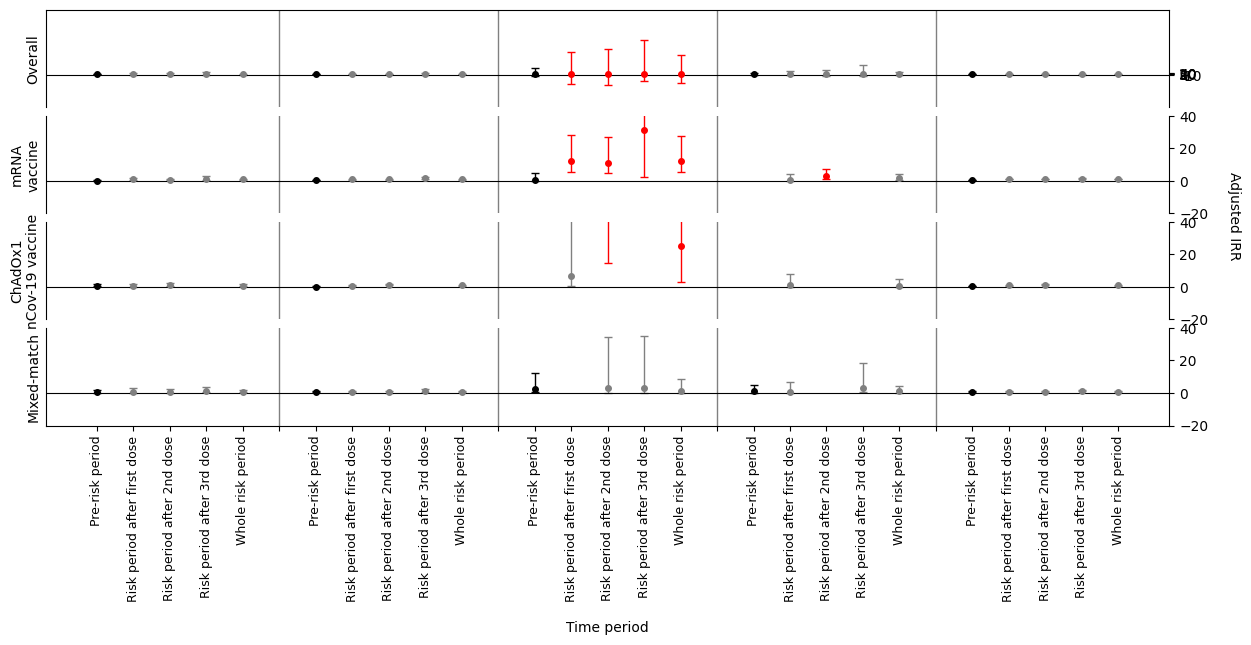

In [17]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 6), constrained_layout=True)

# Define the x positions
x_pos = np.arange(len(x_labels))

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()


# # 각 서브플롯에 대한 색깔을 지정
# colors_overall = []
# colors_mRNA = []
# colors_ChAdOx1 = []
# colors_Mixed = []

# for i in range(len(Overall_error[0])):
#     # For Overall
#     if df['Time period'].iloc[i] == 'Pre-risk period':
#         colors_overall.append('gray')
#     elif Overall_error[0][i] > 1:
#         colors_overall.append('red')
#     else:
#         colors_overall.append('black')

#     # For mRNA
#     if df['Time period'].iloc[i] == 'Pre-risk period':
#         colors_mRNA.append('gray')
#     elif mRNA_error[0][i] > 1:
#         colors_mRNA.append('red')
#     else:
#         colors_mRNA.append('black')

#     # For ChAdOx1
#     if df['Time period'].iloc[i] == 'Pre-risk period':
#         colors_ChAdOx1.append('gray')
#     elif ChAdOx1_error[0][i] > 1:
#         colors_ChAdOx1.append('red')
#     else:
#         colors_ChAdOx1.append('black')

#     # For Mixed
#     if df['Time period'].iloc[i] == 'Pre-risk period':
#         colors_Mixed.append('gray')
#     elif Mixed_error[0][i] > 1:
#         colors_Mixed.append('red')
#     else:
#         colors_Mixed.append('black')



# Your data preparation and color code here

# # Custom transformation function
# def transform_y(y):
#     return np.interp(y, np.linspace(0, 1, 7), [-10, -5, 0, 5, 10, 20, 40])

# # Inverse transformation function for y-ticks labels
# def inverse_transform_y(y):
#     return np.interp(y, np.linspace(0, 1, 7), [-10, -5, 0, 5, 10, 20, 40])


# 변환 함수
def transform_y(y):
    return np.interp(y, [-10, -5, 0, 5, 10, 20, 40], np.linspace(0, 1, 7))

# 역변환 함수 (눈금 레이블을 위해)
def inverse_transform_y(y):
    return np.interp(y, np.linspace(0, 1, 7), [-10, -5, 0, 5, 10, 20, 40])


# Applying transformation function
transformed_y_values_overall = transform_y(df['Overall'].values)



# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# Overall 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, transformed_y_values_overall, colors_overall)):
    lower_error = Overall_error[0][i]
    upper_error = Overall_error[1][i]
    ax[0].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# mRNA 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_mRNA, colors_mRNA)):
    lower_error = mRNA_error[0][i]
    upper_error = mRNA_error[1][i]
    ax[1].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# ChAdOx1 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_ChAdOx1, colors_ChAdOx1)):
    lower_error = ChAdOx1_error[0][i]
    upper_error = ChAdOx1_error[1][i]
    ax[2].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# Mixed 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Mixed, colors_Mixed)):
    lower_error = Mixed_error[0][i]
    upper_error = Mixed_error[1][i]
    ax[3].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)


# Set transformed y-ticks and their labels
yticks_transformed = transform_y(np.array([-10, 0, 5, 10, 20, 40]))
ax[0].set_yticks(yticks_transformed)
ax[0].set_yticklabels([-10, 0, 5, 10, 20, 40])


# Remove label for -10
yticklabels = ax[0].get_yticklabels()
yticklabels[0].set_visible(False)
ax[0].set_yticklabels(yticklabels)



# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=90, fontsize=9)

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2)

# 값 범위 설정
ax[0].set_ylim(-20,40)
ax[1].set_ylim(-20,40)
ax[2].set_ylim(-20,40)
ax[3].set_ylim(-20,40)

# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270)


# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(0, color='black', linewidth=0.8)
ax[1].axhline(0, color='black', linewidth=0.8)
ax[2].axhline(0, color='black', linewidth=0.8)
ax[3].axhline(0, color='black', linewidth=0.8)

# Adding labels and title
plt.xlabel('Time period')
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


# Show the plot
plt.show()

[0.00933333 0.01733333 0.01533333 0.037      0.011             nan
 0.00366667 0.00633333 0.00666667 0.01833333 0.00466667        nan
 0.11966667 0.17666667 0.1865     0.35483333 0.16608333        nan
 0.03366667 0.05466667 0.07766667 0.18766667 0.04066667        nan
 0.00266667 0.00433333 0.00466667 0.01066667 0.003     ]
[0.01166667 0.02566667 0.021      0.05033333 0.015             nan
 0.00533333 0.01033333 0.00966667 0.03066667 0.007             nan
 0.14066667 0.19675    0.20808333 0.07491667 0.18908333        nan
        nan 0.11466667 0.148             nan 0.07466667        nan
 0.00366667 0.006      0.00633333 0.01533333 0.00466667]
[0.033      0.044      0.05266667        nan 0.03033333        nan
 0.005      0.01133333 0.01833333        nan 0.01              nan
        nan 0.447      0.                nan 0.12458333        nan
        nan 0.23133333        nan        nan 0.138             nan
 0.00466667 0.008      0.01133333        nan 0.00666667]
[0.033      0.06433333 0.

<ipython-input-32-00be2a755b1c>:164: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


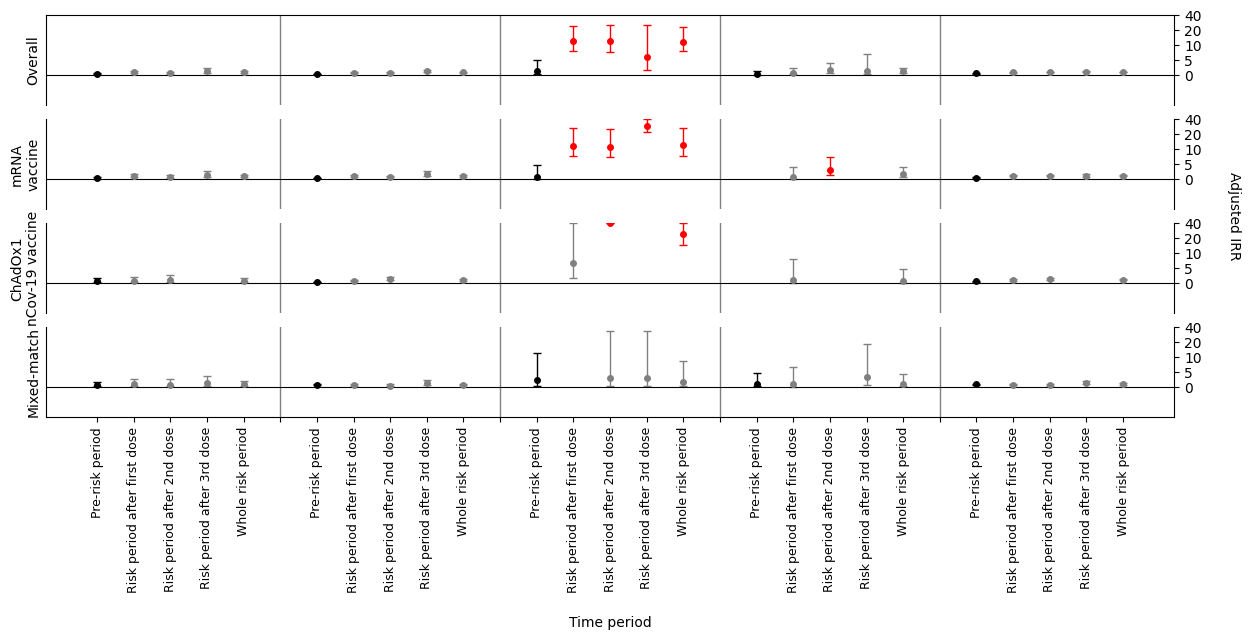

In [32]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 6), constrained_layout=True)

# Define the x positions
x_pos = np.arange(len(x_labels))

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()

# 변환 함수
def transform_y(y):
    return np.interp(y, [-10, -5, 0, 5, 10, 20, 40], np.linspace(0, 1, 7))

# 역변환 함수 (눈금 레이블을 위해)
def inverse_transform_y(y):
    return np.interp(y, np.linspace(0, 1, 7), [-10, -5, 0, 5, 10, 20, 40])


# 함수를 정의하거나 람다를 사용하여 y축 눈금과 레이블을 설정합니다.
def format_func(value, tick_number):
    return '{:.0f}'.format(inverse_transform_y(value))

formatter = FuncFormatter(format_func)

# 모든 서브플롯에 대해 설정을 적용합니다.
for ax_i in ax:
    ax_i.yaxis.set_major_formatter(formatter)
    ax_i.set_yticks(transform_y([0, 5, 10, 20, 40]))

# 색깔을 지정할 리스트 생성
colors = ['black' if time_period == 'Pre-risk period' else 'gray' for time_period in df['Time period']]

# # First, plot the error bars with the desired color for the lines
# for i, (x, y, color) in enumerate(zip(x_pos, df_Overall, colors)):
#     lower_error = Overall_error[0][i]
#     upper_error = Overall_error[1][i]
    # ax[0].errorbar(range(len(y_values)), transformed_y_values, yerr=[[transformed_y_lower_errors], [transformed_y_upper_errors]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[0].errorbar(x_pos, transformed_y_values, yerr=[[transformed_y_lower_errors], [transformed_y_upper_errors]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[1].errorbar(x_pos, mRNA_error, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[2].errorbar(x_pos, df_ChAdOx1, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[3].errorbar(x_pos, df_Mixed, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)


#Datasets

datasets = [
    {'data': 'Overall', 'lower': 'Overall_Lower', 'upper': 'Overall_Upper'},
    {'data': 'mRNA vaccine', 'lower': 'mRNA_Lower', 'upper': 'mRNA_Upper'},
    {'data': 'ChAdOx1 nCov-19 vaccine ', 'lower': 'ChAdOx1_Lower', 'upper': 'ChAdOx1_Upper'},
    {'data': 'Mixed-match', 'lower': 'Mixed_Lower', 'upper': 'Mixed_Upper'}
]

# Plotting
colors_datasets = [colors_overall, colors_mRNA, colors_ChAdOx1, colors_Mixed]

# Plotting
for ax_i, dataset, colors in zip(ax, datasets, colors_datasets):
    data_values = df[dataset['data']].values
    lower_errors = df[dataset['lower']].values
    upper_errors = df[dataset['upper']].values

    # Transform y-values and errors
    transformed_y_values = transform_y(data_values)
    transformed_y_lower_errors = transform_y(data_values + lower_errors) - transformed_y_values
    transformed_y_upper_errors = transform_y(data_values + upper_errors) - transformed_y_values
    print(transformed_y_upper_errors)

    # Plot error bars for each point individually to control colors
    for i in range(len(transformed_y_values)):
        ax_i.errorbar(i, transformed_y_values[i],
                      yerr=[[transformed_y_lower_errors[i]], [transformed_y_upper_errors[i]]],
                      fmt='o', markersize=4, elinewidth=1, capsize=3, color=colors[i])

    # y-axis ticks and labels
    ax_i.yaxis.set_major_formatter(formatter)
    ax_i.set_yticks(transform_y([0, 5, 10, 20, 40]))


# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=90, fontsize=9)

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2.2)


# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270)

# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(0.33, color='black', linewidth=0.8)
ax[1].axhline(0.33, color='black', linewidth=0.8)
ax[2].axhline(0.33, color='black', linewidth=0.8)
ax[3].axhline(0.33, color='black', linewidth=0.8)

# # 값 범위 설정
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)
ax[3].set_ylim(0,1)

# Adding labels and title
plt.xlabel('Time period')
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
<ipython-input-46-17eb75082d55>:170: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


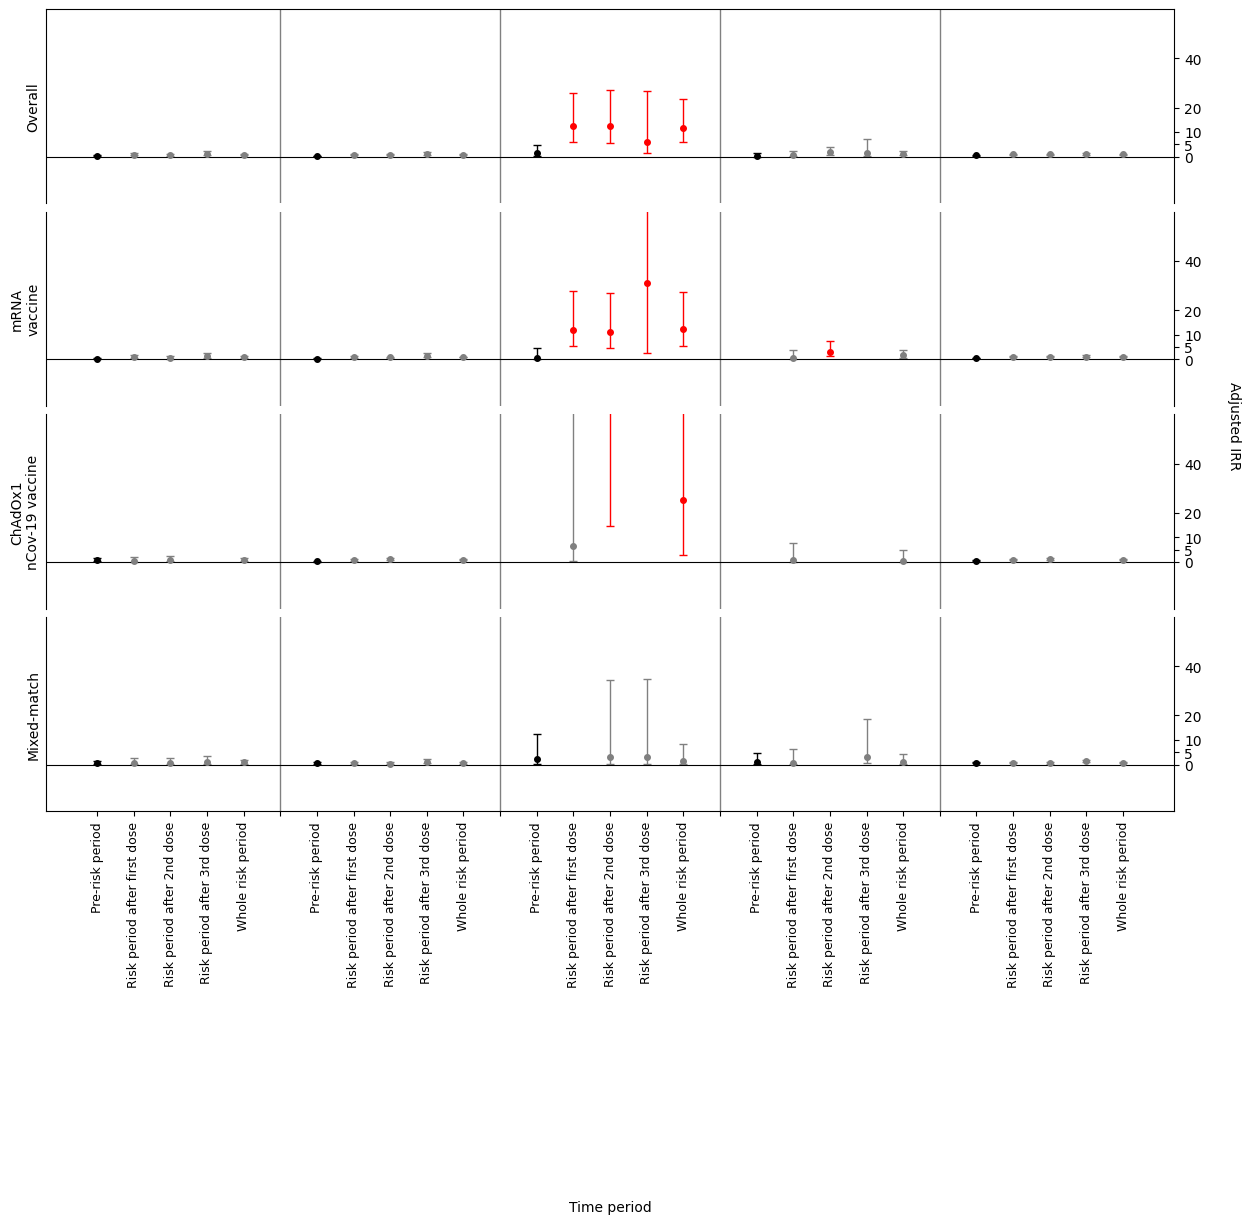

In [46]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()


# 각 서브플롯에 대한 색깔을 지정
colors_overall = []
colors_mRNA = []
colors_ChAdOx1 = []
colors_Mixed = []

for i in range(len(Overall_error[0])):
    # For Overall
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_overall.append('black')
    elif df_Overall[i] - Overall_lower_error[i] > 1:
        colors_overall.append('red')
    else:
        colors_overall.append('grey')

    # For mRNA
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_mRNA.append('black')
    elif df_mRNA[i] - mRNA_lower_error[i] > 1:
        colors_mRNA.append('red')
    else:
        colors_mRNA.append('grey')

    # For ChAdOx1
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_ChAdOx1.append('black')
    elif df_ChAdOx1[i] - ChAdOx1_lower_error[i] > 1:
        colors_ChAdOx1.append('red')
    else:
        colors_ChAdOx1.append('grey')

    # For Mixed
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_Mixed.append('black')
    elif df_Mixed[i] - Mixed_lower_error[i] > 1:
        colors_Mixed.append('red')
    else:
        colors_Mixed.append('grey')






# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# Overall 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Overall, colors_overall)):
    lower_error = Overall_error[0][i]
    upper_error = Overall_error[1][i]
    ax[0].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# mRNA 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_mRNA, colors_mRNA)):
    lower_error = mRNA_error[0][i]
    upper_error = mRNA_error[1][i]
    ax[1].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# ChAdOx1 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_ChAdOx1, colors_ChAdOx1)):
    lower_error = ChAdOx1_error[0][i]
    upper_error = ChAdOx1_error[1][i]
    ax[2].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# Mixed 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Mixed, colors_Mixed)):
    lower_error = Mixed_error[0][i]
    upper_error = Mixed_error[1][i]
    ax[3].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)


# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=90, fontsize=9)

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2)

# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270)


# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 값 범위 설정
y_min = -19  # 변경된 y축 최소값
y_max = 60  # 변경된 y축 최대값

ax[0].set_ylim(y_min, y_max)
ax[1].set_ylim(y_min, y_max)
ax[2].set_ylim(y_min, y_max)
ax[3].set_ylim(y_min, y_max)

# y ticklabel 설정
yticks_values = [0, 5, 10, 20, 40]  # 변경된 y축 눈금값
for ax_i in ax:
    ax_i.set_yticks(yticks_values)

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(0, color='black', linewidth=0.8)
ax[1].axhline(0, color='black', linewidth=0.8)
ax[2].axhline(0, color='black', linewidth=0.8)
ax[3].axhline(0, color='black', linewidth=0.8)

# Adding labels and title
plt.xlabel('Time period')
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


# Show the plot
plt.show()

### y축 4가지 범주로 구분 라벨

<ipython-input-19-1508ddc0ad52>:181: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


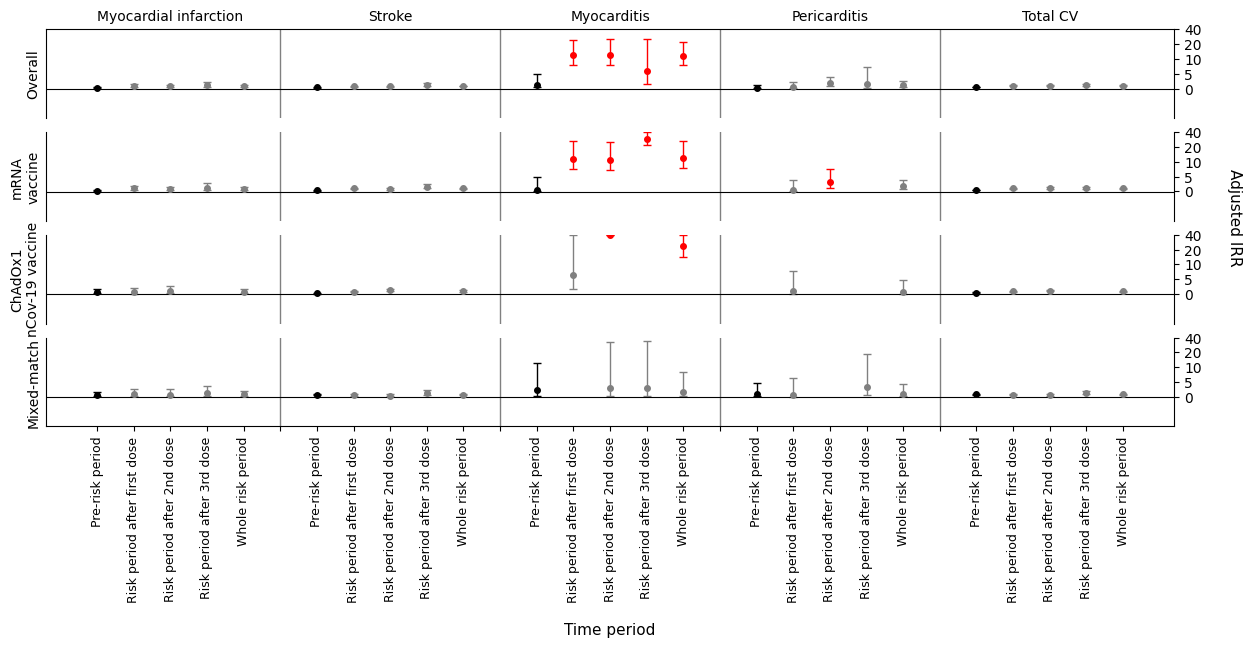

In [19]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 6), constrained_layout=True)

# Define the x positions
x_pos = np.arange(len(x_labels))

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()


# Calculate the midpoints for labels
total_categories = 30
number_of_sections = 5

# Calculate the approximate size of each section
section_length = total_categories // number_of_sections

# Calculate the midpoints for each section
midpoints = [section_length * i + section_length // 2 - 1 for i in range(number_of_sections)]

# Labels to add
labels = ['Myocardial infarction', 'Stroke', 'Myocarditis', 'Pericarditis', 'Total CV']

# Add labels at midpoints
for midpoint, label in zip(midpoints, labels):
    ax[0].text(midpoint, 1.1, label, ha='center')

# 변환 함수
def transform_y(y):
    return np.interp(y, [-10, -5, 0, 5, 10, 20, 40], np.linspace(0, 1, 7))

# 역변환 함수 (눈금 레이블을 위해)
def inverse_transform_y(y):
    return np.interp(y, np.linspace(0, 1, 7), [-10, -5, 0, 5, 10, 20, 40])


# 함수를 정의하거나 람다를 사용하여 y축 눈금과 레이블을 설정합니다.
def format_func(value, tick_number):
    return '{:.0f}'.format(inverse_transform_y(value))

formatter = FuncFormatter(format_func)

# 모든 서브플롯에 대해 설정을 적용합니다.
for ax_i in ax:
    ax_i.yaxis.set_major_formatter(formatter)
    ax_i.set_yticks(transform_y([0, 5, 10, 20, 40]))

# 색깔을 지정할 리스트 생성
colors = ['black' if time_period == 'Pre-risk period' else 'gray' for time_period in df['Time period']]

# # First, plot the error bars with the desired color for the lines
# for i, (x, y, color) in enumerate(zip(x_pos, df_Overall, colors)):
#     lower_error = Overall_error[0][i]
#     upper_error = Overall_error[1][i]
    # ax[0].errorbar(range(len(y_values)), transformed_y_values, yerr=[[transformed_y_lower_errors], [transformed_y_upper_errors]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[0].errorbar(x_pos, transformed_y_values, yerr=[[transformed_y_lower_errors], [transformed_y_upper_errors]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[1].errorbar(x_pos, mRNA_error, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[2].errorbar(x_pos, df_ChAdOx1, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[3].errorbar(x_pos, df_Mixed, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)


#Datasets

datasets = [
    {'data': 'Overall', 'lower': 'Overall_Lower', 'upper': 'Overall_Upper'},
    {'data': 'mRNA vaccine', 'lower': 'mRNA_Lower', 'upper': 'mRNA_Upper'},
    {'data': 'ChAdOx1 nCov-19 vaccine ', 'lower': 'ChAdOx1_Lower', 'upper': 'ChAdOx1_Upper'},
    {'data': 'Mixed-match', 'lower': 'Mixed_Lower', 'upper': 'Mixed_Upper'}
]

# Plotting
colors_datasets = [colors_overall, colors_mRNA, colors_ChAdOx1, colors_Mixed]

# Plotting
for ax_i, dataset, colors in zip(ax, datasets, colors_datasets):
    data_values = df[dataset['data']].values
    lower_errors = df[dataset['lower']].values
    upper_errors = df[dataset['upper']].values

    # Transform y-values and errors
    transformed_y_values = transform_y(data_values)
    transformed_y_lower_errors = transform_y(data_values + lower_errors) - transformed_y_values
    transformed_y_upper_errors = transform_y(data_values + upper_errors) - transformed_y_values

    # Plot error bars for each point individually to control colors
    for i in range(len(transformed_y_values)):
        ax_i.errorbar(i, transformed_y_values[i],
                      yerr=[[transformed_y_lower_errors[i]], [transformed_y_upper_errors[i]]],
                      fmt='o', markersize=4, elinewidth=1, capsize=3, color=colors[i])

    # y-axis ticks and labels
    ax_i.yaxis.set_major_formatter(formatter)
    ax_i.set_yticks(transform_y([0, 5, 10, 20, 40]))


# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=90, fontsize=9)

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2.2)


# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270, fontsize=11)

# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(0.33, color='black', linewidth=0.8)
ax[1].axhline(0.33, color='black', linewidth=0.8)
ax[2].axhline(0.33, color='black', linewidth=0.8)
ax[3].axhline(0.33, color='black', linewidth=0.8)

# 값 범위 설정
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)
ax[3].set_ylim(0,1)

# Adding labels and title
plt.xlabel('Time period', fontsize=11)
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots

# Show the plot
plt.show()

<ipython-input-28-d8b320959db5>:181: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


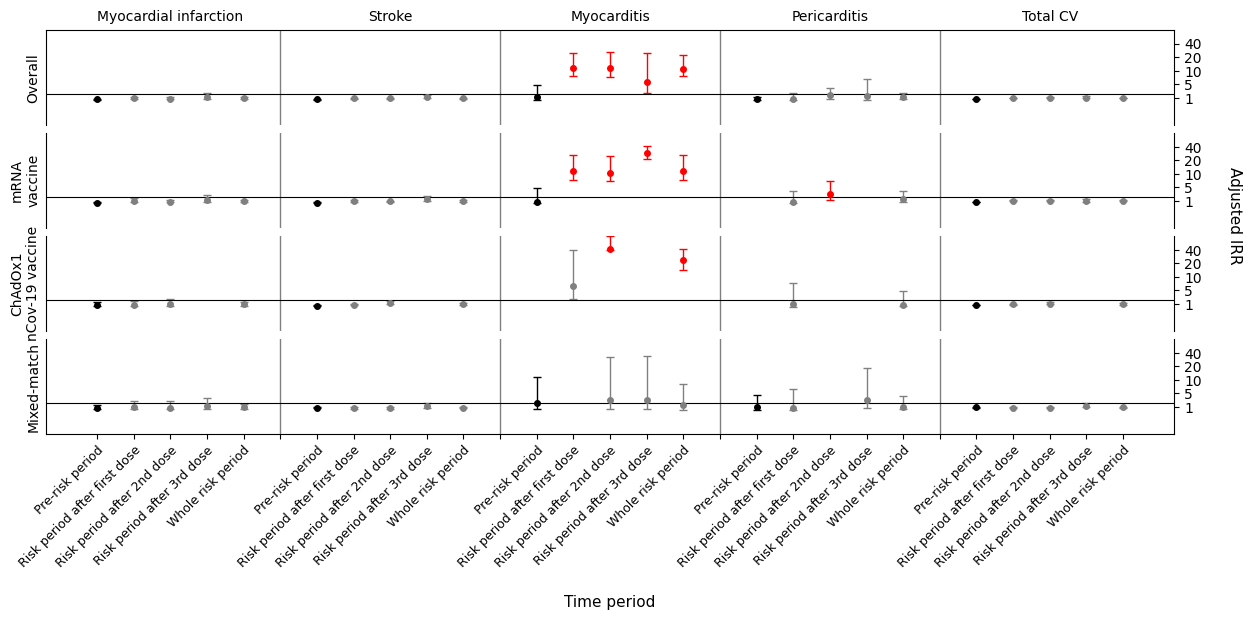

In [28]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 6), constrained_layout=True)

# Define the x positions
x_pos = np.arange(len(x_labels))

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()


# Calculate the midpoints for labels
total_categories = 30
number_of_sections = 5

# Calculate the approximate size of each section
section_length = total_categories // number_of_sections

# Calculate the midpoints for each section
midpoints = [section_length * i + section_length // 2 - 1 for i in range(number_of_sections)]

# Labels to add
labels = ['Myocardial infarction', 'Stroke', 'Myocarditis', 'Pericarditis', 'Total CV']

# Add labels at midpoints
for midpoint, label in zip(midpoints, labels):
    ax[0].text(midpoint, 1.1, label, ha='center')

# 변환 함수
def transform_y(y):
    return np.interp(y, [-10, -5, 1, 5, 10, 20, 40, 5000], np.linspace(0, 1, 8))

# 역변환 함수 (눈금 레이블을 위해)
def inverse_transform_y(y):
    return np.interp(y, np.linspace(0, 1, 8), [-10, -5, 1, 5, 10, 20, 40, 5000])


# 함수를 정의하거나 람다를 사용하여 y축 눈금과 레이블을 설정합니다.
def format_func(value, tick_number):
    return '{:.0f}'.format(inverse_transform_y(value))

formatter = FuncFormatter(format_func)

# 모든 서브플롯에 대해 설정을 적용합니다.
for ax_i in ax:
    ax_i.yaxis.set_major_formatter(formatter)
    ax_i.set_yticks(transform_y([1, 5, 10, 20, 40, 5000]))

# 색깔을 지정할 리스트 생성
colors = ['black' if time_period == 'Pre-risk period' else 'gray' for time_period in df['Time period']]

# # First, plot the error bars with the desired color for the lines
# for i, (x, y, color) in enumerate(zip(x_pos, df_Overall, colors)):
#     lower_error = Overall_error[0][i]
#     upper_error = Overall_error[1][i]
    # ax[0].errorbar(range(len(y_values)), transformed_y_values, yerr=[[transformed_y_lower_errors], [transformed_y_upper_errors]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[0].errorbar(x_pos, transformed_y_values, yerr=[[transformed_y_lower_errors], [transformed_y_upper_errors]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[1].errorbar(x_pos, mRNA_error, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[2].errorbar(x_pos, df_ChAdOx1, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)
# ax[3].errorbar(x_pos, df_Mixed, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)


#Datasets

datasets = [
    {'data': 'Overall', 'lower': 'Overall_Lower', 'upper': 'Overall_Upper'},
    {'data': 'mRNA vaccine', 'lower': 'mRNA_Lower', 'upper': 'mRNA_Upper'},
    {'data': 'ChAdOx1 nCov-19 vaccine ', 'lower': 'ChAdOx1_Lower', 'upper': 'ChAdOx1_Upper'},
    {'data': 'Mixed-match', 'lower': 'Mixed_Lower', 'upper': 'Mixed_Upper'}
]

# Plotting
colors_datasets = [colors_overall, colors_mRNA, colors_ChAdOx1, colors_Mixed]

# Plotting
for ax_i, dataset, colors in zip(ax, datasets, colors_datasets):
    data_values = df[dataset['data']].values
    lower_errors = df[dataset['lower']].values
    upper_errors = df[dataset['upper']].values

    # Transform y-values and errors
    transformed_y_values = transform_y(data_values)
    transformed_y_lower_errors = transform_y(data_values + lower_errors) - transformed_y_values
    transformed_y_upper_errors = transform_y(data_values + upper_errors) - transformed_y_values

    # Plot error bars for each point individually to control colors
    for i in range(len(transformed_y_values)):
        ax_i.errorbar(i, transformed_y_values[i],
                      yerr=[[transformed_y_lower_errors[i]], [transformed_y_upper_errors[i]]],
                      fmt='o', markersize=4, elinewidth=1, capsize=3, color=colors[i])

    # y-axis ticks and labels
    ax_i.yaxis.set_major_formatter(formatter)
    ax_i.set_yticks(transform_y([1, 5, 10, 20, 40]))


# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=45, fontsize=9, va='top', ha='right', rotation_mode='anchor')

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -1.7)


# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270, fontsize=11)

# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(0.33, color='black', linewidth=0.8)
ax[1].axhline(0.33, color='black', linewidth=0.8)
ax[2].axhline(0.33, color='black', linewidth=0.8)
ax[3].axhline(0.33, color='black', linewidth=0.8)

# # 값 범위 설정
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)
ax[3].set_ylim(0,1)

# Adding labels and title
plt.xlabel('Time period', fontsize=11)
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots

# Show the plot
plt.show()

<ipython-input-62-0d4fafb946d8>:202: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


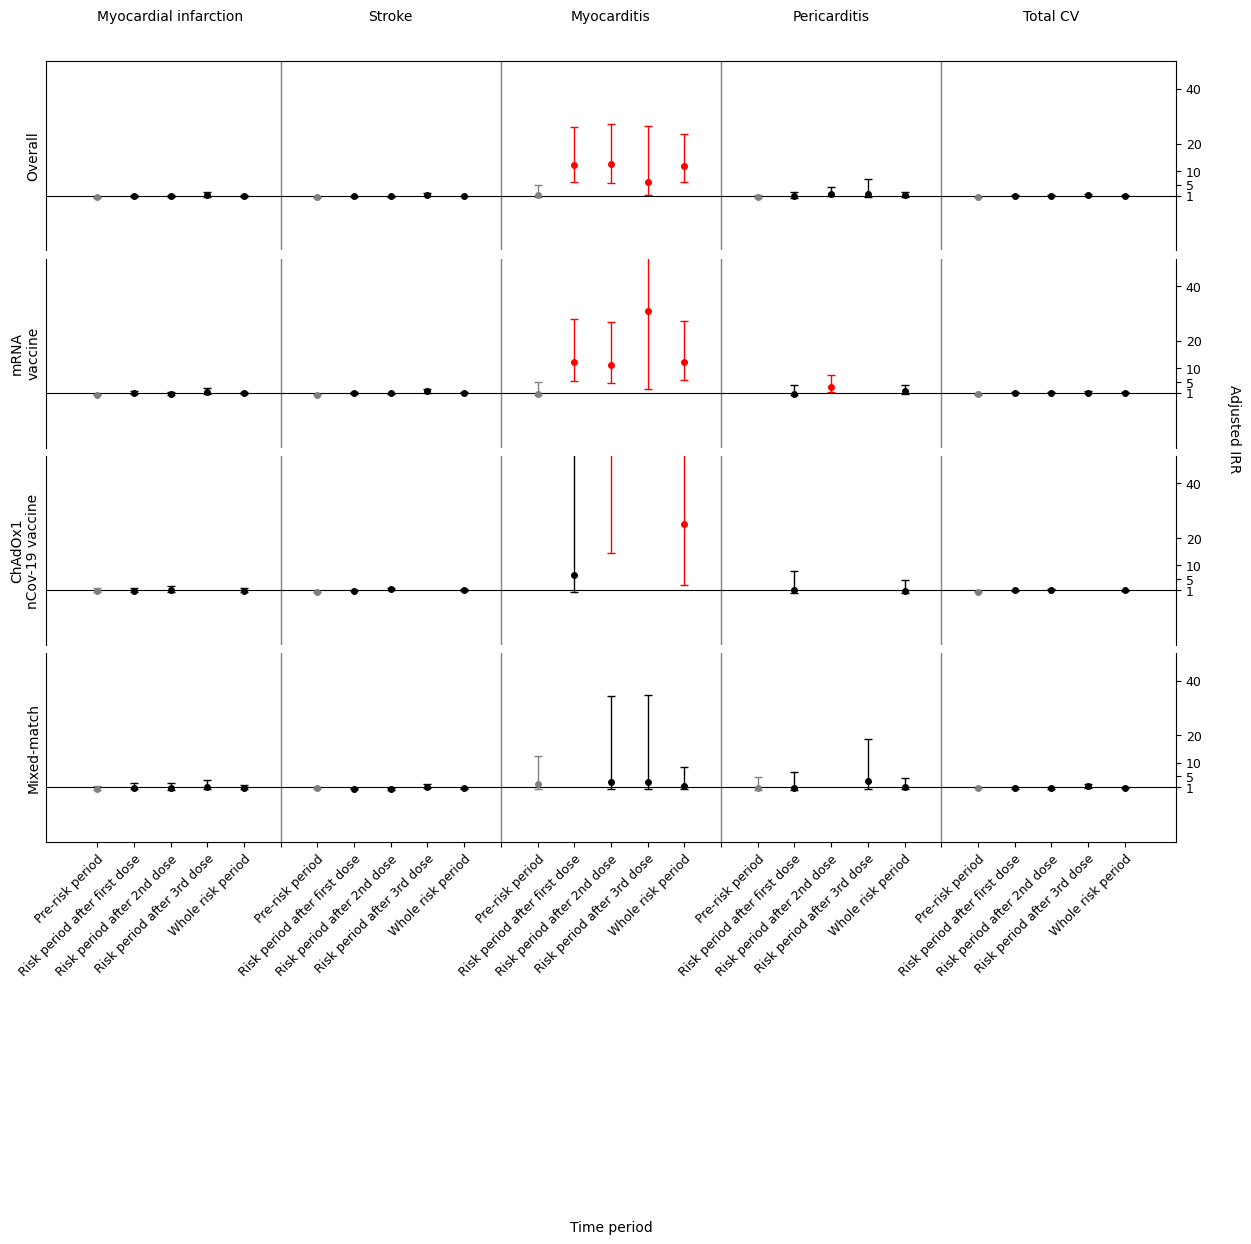

In [62]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the x-labels based on 'CV risk' and 'Time period'
x_labels = df['CV risk'] + ' - ' + df['Time period']

# Set up the figure and axis for the plot
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

Overall_lower_error = pd.to_numeric(df['Overall_Lower']).to_numpy()
Overall_upper_error = pd.to_numeric(df['Overall_Upper']).to_numpy()
mRNA_lower_error = pd.to_numeric(df['mRNA_Lower']).to_numpy()
mRNA_upper_error = pd.to_numeric(df['mRNA_Upper']).to_numpy()
ChAdOx1_lower_error = pd.to_numeric(df['ChAdOx1_Lower']).to_numpy()
ChAdOx1_upper_error = pd.to_numeric(df['ChAdOx1_Upper']).to_numpy()
Mixed_lower_error = pd.to_numeric(df['Mixed_Lower']).to_numpy()
Mixed_upper_error = pd.to_numeric(df['Mixed_Upper']).to_numpy()

Overall_error = [Overall_lower_error,Overall_upper_error]
mRNA_error = [mRNA_lower_error,mRNA_upper_error]
ChAdOx1_error = [ChAdOx1_lower_error,ChAdOx1_upper_error]
Mixed_error = [Mixed_lower_error,Mixed_upper_error]

df_Overall = pd.to_numeric(df['Overall']).to_numpy()
df_mRNA = pd.to_numeric(df['mRNA vaccine']).to_numpy()
df_ChAdOx1 = pd.to_numeric(df['ChAdOx1 nCov-19 vaccine ']).to_numpy()
df_Mixed = pd.to_numeric(df['Mixed-match']).to_numpy()


# Calculate the midpoints for labels
total_categories = 30
number_of_sections = 5

# Calculate the approximate size of each section
section_length = total_categories // number_of_sections

# Calculate the midpoints for each section
midpoints = [section_length * i + section_length // 2 - 1 for i in range(number_of_sections)]

# Labels to add
labels = ['Myocardial infarction', 'Stroke', 'Myocarditis', 'Pericarditis', 'Total CV']

# Add labels at midpoints
for midpoint, label in zip(midpoints, labels):
    ax[0].text(midpoint, 65, label, ha='center')

# 변환 함수
def transform_y(y):
    return np.interp(y, [-10, -5, 1, 5, 10, 20, 40, 5000], np.linspace(0, 1, 8))

# 역변환 함수 (눈금 레이블을 위해)
def inverse_transform_y(y):
    return np.interp(y, np.linspace(0, 1, 8), [-10, -5, 1, 5, 10, 20, 40, 5000])


# 함수를 정의하거나 람다를 사용하여 y축 눈금과 레이블을 설정합니다.
def format_func(value, tick_number):
    return '{:.0f}'.format(inverse_transform_y(value))


# 각 서브플롯에 대한 색깔을 지정
colors_overall = []
colors_mRNA = []
colors_ChAdOx1 = []
colors_Mixed = []

for i in range(len(Overall_error[0])):
    # For Overall
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_overall.append('grey')
    elif df_Overall[i] - Overall_lower_error[i] > 1:
        colors_overall.append('red')
    else:
        colors_overall.append('black')

    # For mRNA
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_mRNA.append('grey')
    elif df_mRNA[i] - mRNA_lower_error[i] > 1:
        colors_mRNA.append('red')
    else:
        colors_mRNA.append('black')

    # For ChAdOx1
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_ChAdOx1.append('grey')
    elif df_ChAdOx1[i] - ChAdOx1_lower_error[i] > 1:
        colors_ChAdOx1.append('red')
    else:
        colors_ChAdOx1.append('black')

    # For Mixed
    if df['Time period'].iloc[i] == 'Pre-risk period':
        colors_Mixed.append('grey')
    elif df_Mixed[i] - Mixed_lower_error[i] > 1:
        colors_Mixed.append('red')
    else:
        colors_Mixed.append('black')






# 각 서브플롯에 대해 수직선 그리기
for pos in x_positions_for_gray_lines:
    ax[0].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[1].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[2].axvline(pos, color='grey', linestyle='-', lw=1)
    ax[3].axvline(pos, color='grey', linestyle='-', lw=1)

# Overall 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Overall, colors_overall)):
    lower_error = Overall_error[0][i]
    upper_error = Overall_error[1][i]
    ax[0].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# mRNA 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_mRNA, colors_mRNA)):
    lower_error = mRNA_error[0][i]
    upper_error = mRNA_error[1][i]
    ax[1].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# ChAdOx1 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_ChAdOx1, colors_ChAdOx1)):
    lower_error = ChAdOx1_error[0][i]
    upper_error = ChAdOx1_error[1][i]
    ax[2].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)

# Mixed 서브플롯
for i, (x, y, color) in enumerate(zip(x_pos, df_Mixed, colors_Mixed)):
    lower_error = Mixed_error[0][i]
    upper_error = Mixed_error[1][i]
    ax[3].errorbar(x, y, yerr=[[lower_error], [upper_error]], fmt='o', markersize=4, elinewidth=1, capsize=3, color=color)


# ' '을 가진 Time period의 x 위치 찾기
x_positions_for_gray_lines = [x for x, label in enumerate(df['Time period']) if label == ' ']

# xticks 맨 아래에 설정
ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(df['Time period'], rotation=45, fontsize=9, va='top', ha='right', rotation_mode='anchor')

# xlabel 위치 더 아래로 설정
ax[3].xaxis.set_label_coords(0.5, -2)

# y ticklabel 설정
ax[0].set_ylabel('Overall')
ax[1].set_ylabel('mRNA\nvaccine')
ax[2].set_ylabel('ChAdOx1\nnCov-19 vaccine')
ax[3].set_ylabel('Mixed-match')

# y라벨 설정
fig.text(1.018, 0.65, 'Adjusted IRR', va='center', rotation=270)


# y축 눈금 오른쪽으로
ax[0].yaxis.tick_right()
ax[1].yaxis.tick_right()
ax[2].yaxis.tick_right()
ax[3].yaxis.tick_right()

# 값 범위 설정
y_min = -19  # 변경된 y축 최소값
y_max = 50  # 변경된 y축 최대값

ax[0].set_ylim(y_min, y_max)
ax[1].set_ylim(y_min, y_max)
ax[2].set_ylim(y_min, y_max)
ax[3].set_ylim(y_min, y_max)

# y ticklabel 설정
yticks_values = [1, 5, 10, 20, 40]  # 변경된 y축 눈금값
for ax_i in ax:
    ax_i.set_yticks(yticks_values)
    ax_i.tick_params(axis='y', labelsize=9)  # 폰트 크기 설정

# 레이아웃 제거
ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[3].spines['top'].set_visible(False)

# 수평선 그리기 (우선은 y=0 기준으로 세팅)
ax[0].axhline(1, color='black', linewidth=0.8)
ax[1].axhline(1, color='black', linewidth=0.8)
ax[2].axhline(1, color='black', linewidth=0.8)
ax[3].axhline(1, color='black', linewidth=0.8)

# Adding labels and title
plt.xlabel('Time period')
# plt.ylabel('Value')
# plt.title('Error Bar Plot')
# plt.legend()

# plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots


# Show the plot
plt.show()

In [ ]:
df['mRNA_Lower']

####  테스트

In [ ]:
x_pos

In [ ]:
# Check the range of values in df['Overall']
df['Overall'].describe()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.array([0, 1, 2])
y = np.array([1, 2, 3])

# Error values for lower and upper bounds
lower_error = np.array([0.1, 0.2, 0.1])
upper_error = np.array([0.2, 0.3, 0.2])

# Combine into 2D array ([lower bounds], [upper bounds])
asymmetric_error = [lower_error, upper_error]

plt.errorbar(x, y, yerr=asymmetric_error, fmt='o')
plt.show()


In [ ]:
df_Overall

In [ ]:
y

In [ ]:
asymmetric_error

In [ ]:
Overall_error

In [ ]:
Overall_lower_error

In [ ]:
df_Overall

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 가정: df_test는 데이터프레임, 'CV risk' 및 'Time period' 열을 포함
# 여기서는 임시 데이터를 사용
df_test = pd.DataFrame({
    'CV risk': ['A', 'A', 'B', 'B'],
    'Time period': ['Pre', 'Post', 'Pre', 'Post'],
    'Value': [1, 2, 3, 4]
})

cv_risks = df_test['CV risk'].unique()
time_periods = df_test['Time period'].unique()

fig, ax = plt.subplots()

# 각 CV risk에 대해 반복
for idx, risk in enumerate(cv_risks):
    sub_df_test = df_test[df_test['CV risk'] == risk]
    for j, period in enumerate(time_periods):
        value = sub_df_test[sub_df_test['Time period'] == period]['Value'].values[0] if period in sub_df_test['Time period'].values else None
        ax.bar(idx * (len(time_periods) + 1) + j, value, label=f"{risk} - {period}")

ax.set_xticks([idx * (len(time_periods) + 1) + len(time_periods) / 2 for idx in range(len(cv_risks))])
ax.set_xticklabels(cv_risks)
plt.legend()

plt.show()


In [ ]:
cv_risks

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
y_values = [0, 5, 10, 20, 40]
x_values = np.arange(len(y_values))

# Create the figure and the line that shows the y-values
fig, ax = plt.subplots()

# Set the x-ticks to correspond to y-values, and set their labels
ax.set_xticks(x_values)
ax.set_xticklabels(y_values)

# Transformed y-values for equal spacing on the graph
transformed_y_values = np.linspace(0, 1, len(y_values))

# Plot the data
ax.plot(x_values, transformed_y_values, marker='o')

# Set up a function to transform the y-axis labels
def format_fn(tick_val, tick_pos):
    if int(tick_val) in x_values:
        return y_values[int(tick_val)]
    else:
        return ''

# Update y-ticks to show the original scale
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_fn))
ax.set_yticks(transformed_y_values)
ax.set_yticklabels(y_values)

plt.show()


In [ ]:
transformed_y_values

In [ ]:
df_Overall

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 샘플 데이터 및 에러
y_values = np.array([0.34, 0.87, 0.71, 1.26, 0.86])
y_errors = np.array([0.1, 0.2, 0.15, 0.3, 0.25])

# 변환 함수
def transform_y(y):
    return np.interp(y, [0, 5, 10, 20, 40], np.linspace(0, 1, 5))

# 역변환 함수 (눈금 레이블을 위해)
def inverse_transform_y(y):
    return np.interp(y, np.linspace(0, 1, 5), [0, 5, 10, 20, 40])

# 그래프 그리기
fig, ax = plt.subplots()

# y값과 에러 변환
transformed_y_values = transform_y(y_values)
transformed_y_errors = transform_y(y_values + y_errors) - transformed_y_values

# 에러바 그래프
ax.errorbar(range(len(y_values)), transformed_y_values, yerr=transformed_y_errors, fmt='o')

# y축 눈금과 레이블 설정
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(inverse_transform_y(x))))
ax.set_yticks(transform_y([0, 5, 10, 20, 40]))

plt.show()


In [ ]:
np.linspace(0, 1, 5)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create x and y data
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 1, 3])

# Plot with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=[[1, 0.2, 0.3, 0.4], [0.1, 0.2, 0.3, 0.4]], fmt='o', markersize=5, capsize=5)
plt.title("Error Bar Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()